In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sudhakarbolleddu","key":"dee12ded2b98449148d71ac18fbc496e"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                       title                                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                           DAIGT V2 Train Dataset                  29MB  2023-11-16 01:38:36           1278        140  1.0              
muhammadbinimran/housing-price-prediction-data            Housing Price Prediction Data          763KB  2023-11-21 17:56:32           5072         95  1.0              
thedevastator/netflix-imdb-scores                         Netflix IMDB Scores                    699KB  2023-12-03 14:10:34           1129         23  1.0              
youssefaboelwafa/hotel-booking-cancellation-prediction    Hotel Booking Cancellation Prediction  470KB  2023-12-03 01:54:35            790         24  1.0 

In [6]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

100% 9.65G/9.66G [01:45<00:00, 78.4MB/s]
100% 9.66G/9.66G [01:45<00:00, 98.0MB/s]


In [7]:
!unzip diabetic-retinopathy-level-detection.zip

Archive:  diabetic-retinopathy-level-detection.zip
  inflating: inception-diabetic.h5   
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfb17a7cc8d4.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfdbaef73a8b.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfed7c1172ec.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cff262ed8f4c.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cffc50047828.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d02b79fc3200.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d0926ed2c8e5.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d160ebef4117.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e39b9d6f0.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e59a2b33a.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d18f64

In [8]:

from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pwd

'/content'

In [10]:
ls

 diabetic-retinopathy-level-detection.zip   kaggle.json              sample_data/
 inception-diabetic.h5                     'preprocessed dataset'/


In [11]:
cd /content/preprocessed dataset/preprocessed dataset

/content/preprocessed dataset/preprocessed dataset


In [12]:
imageSize = [299, 299]

trainPath = r"/content/preprocessed dataset/preprocessed dataset/training"

testPath = r"/content/preprocessed dataset/preprocessed dataset/testing"

In [13]:
xception = Xception(input_shape=imageSize + [3], weights='imagenet',include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [14]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [15]:
# our layers - you can add more if you want
x = Flatten()(xception.output)

In [16]:
prediction = Dense(5, activation='softmax')(x)

In [17]:
# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
  )

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory(r'/content/preprocessed dataset/preprocessed dataset/training',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/preprocessed dataset/preprocessed dataset/testing',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [22]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=2,
  validation_steps=2
)

Epoch 1/35
2/2 [==============================] - 100s 68s/step - loss: 7.7960 - accuracy: 0.3281 - val_loss: 6.1506 - val_accuracy: 0.6562
Epoch 2/35
2/2 [==============================] - 88s 63s/step - loss: 9.2287 - accuracy: 0.5469 - val_loss: 6.3702 - val_accuracy: 0.4844
Epoch 3/35
2/2 [==============================] - 88s 61s/step - loss: 8.5291 - accuracy: 0.4531 - val_loss: 6.2149 - val_accuracy: 0.6406
Epoch 4/35
2/2 [==============================] - 132s 102s/step - loss: 8.1152 - accuracy: 0.4844 - val_loss: 10.9487 - val_accuracy: 0.5156
Epoch 5/35
2/2 [==============================] - 116s 92s/step - loss: 6.4792 - accuracy: 0.6522 - val_loss: 13.5661 - val_accuracy: 0.4375
Epoch 6/35
2/2 [==============================] - 87s 61s/step - loss: 6.1418 - accuracy: 0.5938 - val_loss: 5.3389 - val_accuracy: 0.6875
Epoch 7/35
2/2 [==============================] - 89s 63s/step - loss: 5.0558 - accuracy: 0.7344 - val_loss: 6.2400 - val_accuracy: 0.6875
Epoch 8/35
2/2 [=====

In [23]:
model.save('GCOLB-DR.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
ls -1

GCOLB-DR.h5
testing/
training/


In [25]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [26]:
img = image.load_img('/content/dr1.jpeg',target_size=(299,299))

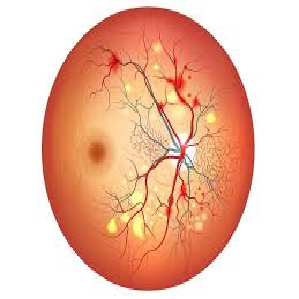

In [27]:
img

In [28]:
img = image.img_to_array(img)

In [29]:
img = np.expand_dims(img,axis=0)

In [30]:
np.argmax(model.predict(img))

1/1 [==============================] - 2s 2s/step


4

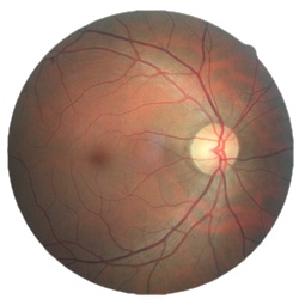

In [31]:
img = image.load_img('/content/retina.jpg',target_size=(299,299))
img

In [32]:
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
np.argmax(model.predict(img))

1/1 [==============================] - 0s 364ms/step


4